In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, ConfusionMatrixDisplay, 
    classification_report, roc_auc_score, roc_curve) 

In [2]:
df = pd.read_csv('/Users/sudin.giri/Downloads/HR_comma_sep.csv')

In [3]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df1 = df.copy()

# After Loading our dataset and checking the stats of our dataset, the data types, number of entries, null-counts, we now will check if there is any outliers that will create noise in our dataset.


In [8]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
df1.columns = ['satisfied', 'evaluation', 'projects','avg_monthly_hours', 'years_in', 'accident', 'exited', 'promoted', 'department', 'salary']
df1.head()

,satisfied,evaluation,projects,avg_monthly_hours,years_in,accident,exited,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
print(df1.columns.tolist())


['satisfied', 'evaluation', 'projects', 'avg_monthly_hours', 'years_in', 'accident', 'exited', 'promoted', 'department', 'salary']


In [11]:
avg_hours_dept = df1.groupby('department')['avg_monthly_hours'].mean().sort_values(ascending=False)

In [12]:
avg_hours_dept

department
technical      202.497426
IT             202.215974
management     201.249206
accounting     201.162973
sales          200.911353
RandD          200.800508
support        200.758188
product_mng    199.965632
marketing      199.385781
hr             198.684709
Name: avg_monthly_hours, dtype: float64

In [13]:
promo_count = df1.groupby('department')['promoted'].sum().sort_values(ascending = False)
promo_count

department
sales          100
management      69
marketing       43
technical       28
RandD           27
support         20
hr              15
accounting      14
IT               3
product_mng      0
Name: promoted, dtype: int64

In [14]:



merged_df = pd.concat([avg_hours_dept, promo_count], axis=1)
merged_df.columns = ['avg_monthly_hours', 'promotion_count']
merged_df = merged_df.sort_values(by='promotion_count', ascending=False)

print(merged_df)

             avg_monthly_hours  promotion_count
department                                     
sales               200.911353              100
management          201.249206               69
marketing           199.385781               43
technical           202.497426               28
RandD               200.800508               27
support             200.758188               20
hr                  198.684709               15
accounting          201.162973               14
IT                  202.215974                3
product_mng         199.965632                0


# Hmm, Every department has very close average montlhy hours but there's drastic differences when it comes to the promotions received by employees in each department. This can be one of the major reasons for employees exiting the company. Lets visualise this .


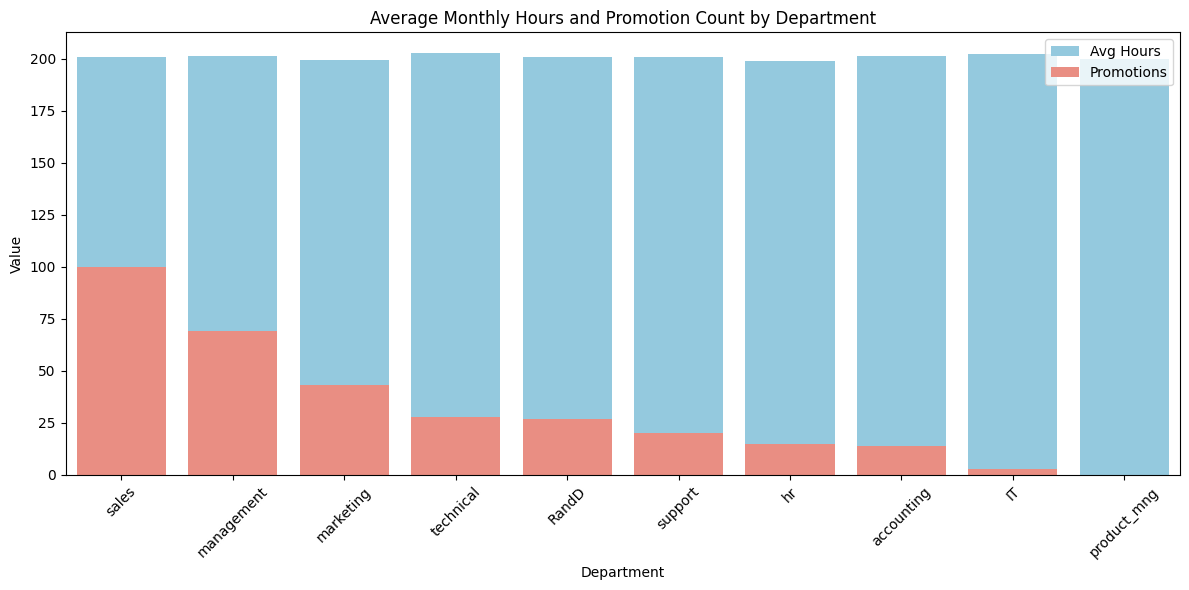

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='avg_monthly_hours', data=merged_df, color='skyblue', label='Avg Hours')
sns.barplot(x='department', y='promotion_count', data=merged_df, color='salmon', label='Promotions')

# Add legend and labels
plt.title('Average Monthly Hours and Promotion Count by Department')
plt.xlabel('Department')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Now lets see if employees from department that recieved less or no promotion were the most to exit the company, if that is so, then promotion can be a good indicator for our soon-to-be prediction variable (Exited) for model building.

In [16]:
df1.head()

,satisfied,evaluation,projects,avg_monthly_hours,years_in,accident,exited,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
exited = df1.groupby('department')['exited'].sum().sort_values(ascending=False)

In [18]:
exited

department
sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: exited, dtype: int64

In [19]:
# Now lets combine the exited and promotion to see if promotion was a factor.

merged_exited =  pd.concat([promo_count, exited], axis=1)
merged_exited.columns = ['promotion_count', 'exited']
merged_exited = merged_exited.sort_values(by='exited', ascending=False)

print(merged_exited)

             promotion_count  exited
department                          
sales                    100    1014
technical                 28     697
support                   20     555
IT                         3     273
hr                        15     215
accounting                14     204
marketing                 43     203
product_mng                0     198
RandD                     27     121
management                69      91


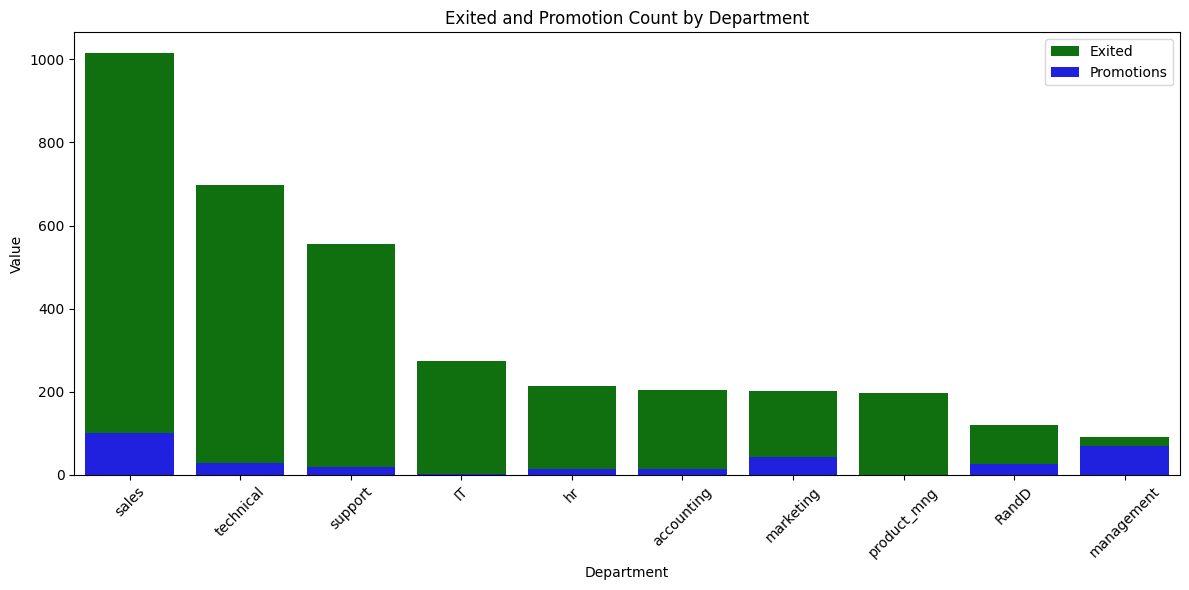

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='department', y='exited', data=merged_exited, color='green', label='Exited')
sns.barplot(x='department', y='promotion_count', data=merged_exited, color='blue', label='Promotions')

# Add legend and labels
plt.title('Exited and Promotion Count by Department')
plt.xlabel('Department')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Apart from Management department, other department had reasonable employees exit in ratio to the promotion received by the department. The graph is interesting for the insight on Management.

In [21]:
df1.head()

,satisfied,evaluation,projects,avg_monthly_hours,years_in,accident,exited,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [22]:
df1['salary'] = df1['salary'].map({'low':0, 'medium' : 1, 'high' : 2})
# Encoding the categorical values in salary in numeric for machine learning in next steps.

In [23]:
df1.head()

,satisfied,evaluation,projects,avg_monthly_hours,years_in,accident,exited,promoted,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


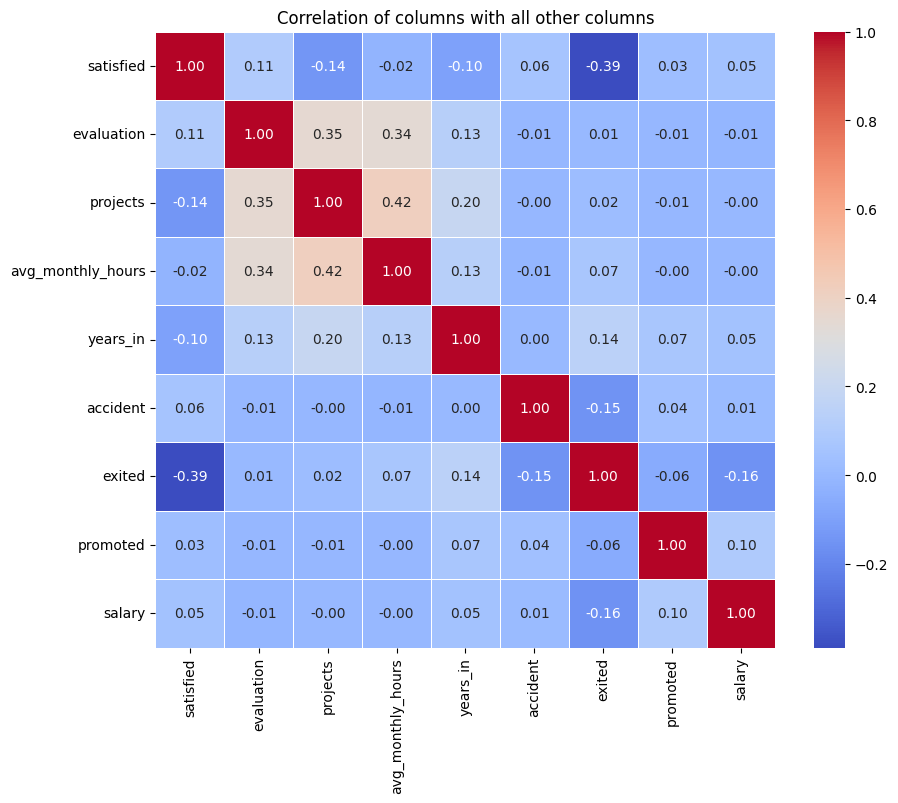

In [24]:
# Lets plot the correlation of all the columns (in numeric) with each other 
#to see if any factor that has positive or negative correlation with Exited
corr_col = df1.corr(numeric_only = True)
### Heatmap of the matrix below:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_col, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of columns with all other columns')
plt.show()

# Here what we were after is, Exited column with all other columns correlation, what caught the attention here is satisfied column being the only column closest to being any correlated to exited. In real world scenario, it is true, satisfaction of the job does matter if an employee stays or quits. However it never is the only factor.

In [25]:
# Feature engineering - This stage we will try and make fruitful columns out of existing columns for our machine leanring model.
df1['avg_year_work'] = df1['avg_monthly_hours'] * 12 * df1['years_in']
df1['avg_year_work'].describe()

count    14999.000000
mean      8551.640509
std       4471.033236
min       2304.000000
25%       5328.000000
50%       7056.000000
75%      10692.000000
max      34080.000000
Name: avg_year_work, dtype: float64

In [26]:
# Lets build our model, train,test, split the data. 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['department_code'] = le.fit_transform(df1['department']) 

In [27]:
df1['department_code'].unique()
df1['exited'].value_counts()

exited
0    11428
1     3571
Name: count, dtype: int64

In [28]:
df2 = df1.copy()
X = df2.drop(columns = ['exited' , 'department'])
y = df1['exited']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 42, stratify = y)

In [30]:
rf = RandomForestClassifier(random_state =42)

param_grid = {
    'n_estimators' : [10,50,100],
    'max_depth' : [None, 3, 5],
    'min_samples_split' :[2,4],
    'min_samples_leaf' : [1,2],
    'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',   # or 'roc_auc', 'f1', etc.
    cv=5
)

In [31]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 3, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [32]:
print("Best parameters:", grid_search.best_params_)
print("Best CV score:  ", grid_search.best_score_)
# The tuned estimator:
best_rf = grid_search.best_estimator_


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score:   0.9908436539696656


In [33]:
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2857
           1       1.00      0.97      0.98       893

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       0.99      0.99      0.99      3750

[[2853    4]
 [  31  862]]


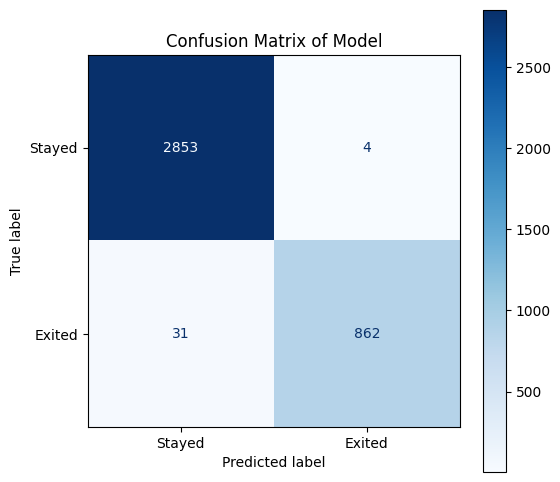

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp_cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Stayed', 'Exited'])
fig, ax = plt.subplots(figsize=(6, 6))
disp_cm.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix of Model')
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
plt.show()

# Our model has the accuracy of 0.99 meaning it predicted 99% correctly when given an un-seen set of data. This typically doesn't mean that it will be the best model , but in this scenario it has performed well in recall, precision, and f1 too.